<a href="https://colab.research.google.com/github/Kaizensk/Email-marketing-effectiveness-prediction/blob/main/Capstone2_EmailEffectivenessPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np # linear algebra
import pandas as pd

In [4]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
# Read the csv data
path = "/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 4/capstone2/data_email_campaign.csv"
df = pd.read_csv(path)
df1 = pd.DataFrame(df)
print(df1.isnull().sum())
df1 = df1.dropna()
print(df1.head())
#df2 = pd.DataFrame(df3)
#print(df1)

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64
            Email_ID  Email_Type  ...  Total_Images  Email_Status
0  EMA00081000034500           1  ...           0.0             0
2  EMA00081000066290           2  ...           0.0             1
3  EMA00081000076560           1  ...           0.0             0
4  EMA00081000109720           1  ...           0.0             0
6  EMA00081000160500           1  ...           0.0             0

[5 rows x 12 columns]


In [5]:
df1 = pd.DataFrame(df)
print(df1.axes)
df1 =df1.dropna()
print(df1.head())

[RangeIndex(start=0, stop=68353, step=1), Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')]
            Email_ID  Email_Type  ...  Total_Images  Email_Status
0  EMA00081000034500           1  ...           0.0             0
2  EMA00081000066290           2  ...           0.0             1
3  EMA00081000076560           1  ...           0.0             0
4  EMA00081000109720           1  ...           0.0             0
6  EMA00081000160500           1  ...           0.0             0

[5 rows x 12 columns]


IGNORED: 38772
READ: 7841
Acknowledge: 1678


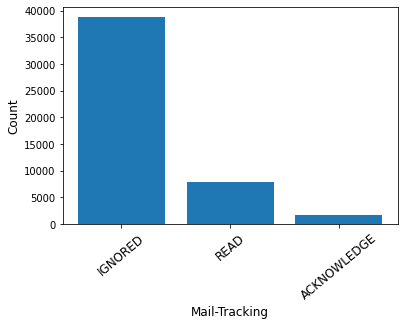

In [6]:
import numpy as np

ignored = len(df1[df1['Email_Status']==0])
read  = len(df1[df1['Email_Status']==1])
acknowledge = len(df1[df1['Email_Status']==2])

print("IGNORED:",ignored)
print("READ:",read)
print("Acknowledge:",acknowledge)

labels = ['IGNORED','READ','ACKNOWLEDGE']
li = [ignored,read,acknowledge]

index = np.arange(len(labels))

plt.bar(index,li)
plt.xlabel('Mail-Tracking',fontsize =12)
plt.ylabel('Count',fontsize =12)
plt.xticks(index,labels,fontsize=12,rotation=40)
plt.show()


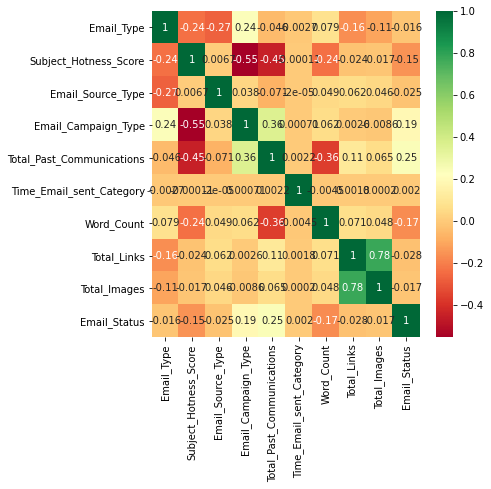

In [7]:
import seaborn as sc

X2 = df1.iloc[:,1:7]
Y2 = df1.iloc[:,-1]

corrmat  = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(6,6))

g= sc.heatmap(df1[top_corr_features].corr(),annot = True,cmap ="RdYlGn")

X_val = df1.iloc[:,1:7]
Y_val = df1.iloc[:,-1]
Y_val = Y_val.astype('int')

#X_train,X_test,Y_train,Y_test = train_test_split(X_val,Y_val,test_size=0.35,random_state = 32)

In [8]:
y_col = df1.Email_Status
print(y_col.shape)
df1.corr()
df1.nunique()

(48291,)


Email_ID                     48291
Email_Type                       2
Subject_Hotness_Score           51
Email_Source_Type                2
Customer_Location                7
Email_Campaign_Type              3
Total_Past_Communications       64
Time_Email_sent_Category         3
Word_Count                     151
Total_Links                     37
Total_Images                    44
Email_Status                     3
dtype: int64

In [9]:
df1.describe()
df1.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [12]:
df1.Email_Type.value_counts()

1    34507
2    13784
Name: Email_Type, dtype: int64

In [13]:
df1.groupby('Email_Type').agg(['nunique'])

,Email_ID,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
,nunique,nunique,nunique,nunique,nunique,nunique,nunique,nunique,nunique,nunique,nunique
Email_Type,,,,,,,,,,,
1,34507,51,2,7,3,64,3,151,37,44,3
2,13784,49,2,7,3,64,3,151,31,35,3
